### MCAR (Missing Completely at Random)

Context: Survey papers get damaged by rain randomly.

Missingness has nothing to do with the person’s age, income, or answers, it’s just chance.

Impact: Safe to ignore/delete missing rows, no bias.

### MAR (Missing At Random)

Context: In a survey, young people are less likely to report their income.

Missingness depends on age (observed), but not on the actual income itself.

Impact: Can adjust using observed variables (like age) to reduce bias.

### MNAR (Missing Not At Random)

Context: In the same survey, rich people choose not to report their income.

Missingness depends on the actual income value (unobserved).

Impact: Hardest case, requires special modeling or more data.

In [496]:
import seaborn as sns
import matplotlib.pyplot as plt

In [497]:
df = sns.load_dataset('titanic')

In [498]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [499]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [500]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [501]:
# Initial shape
df.shape

(891, 15)

In [502]:
# Deleting  the rows to handle missing values
df.dropna(axis = 0).shape

(182, 15)

In [503]:
# Column wise deletion
df.dropna(axis = 1).shape

(891, 11)

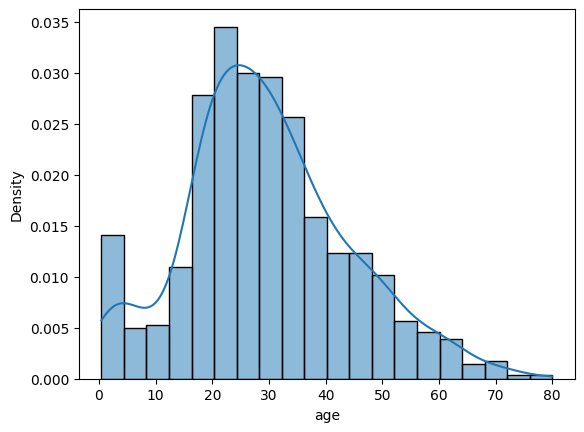

In [504]:
# Imputation missing values

# Mean Value Imputation

sns.histplot(df['age'], kde = True, stat = 'density')
plt.show()

In [505]:
df['Mean_Age'] = df['age'].fillna(df['age'].mean())

In [506]:
df[['Mean_Age', "age"]]

,Mean_Age,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [507]:
#Mean Imputation works well with Normally distributed data

In [508]:
#Median Value Imputation - If we have outliers in our dataset

In [509]:
df['Median_Age'] = df['age'].fillna(df['age'].median())

In [510]:
df[['Median_Age', 'Mean_Age', "age"]]

,Median_Age,Mean_Age,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


In [511]:
#Mode Imputation Technique - Categorical Values

df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Mean_Age,Median_Age
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [512]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [513]:
mode = df[df['embarked'].notna()]['embarked'].mode()[0]

In [514]:
df['embarked_mode'] = df[['embarked']].fillna(mode)

In [515]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [516]:
#Random Sampling Imputation

df.isnull().sum()

survived           0
pclass             0
sex                0
age              177
sibsp              0
parch              0
fare               0
embarked           2
class              0
who                0
adult_male         0
deck             688
embark_town        2
alive              0
alone              0
Mean_Age           0
Median_Age         0
embarked_mode      0
dtype: int64

In [517]:
import numpy as np

In [518]:
# rand = np.random.choice(df[df['age'].notna()]['age']) # random single-value imputation

In [519]:
df['random_age'] = df['age']

In [520]:
size = df['age'].isnull()

In [521]:
df.loc[size, 'random_age'] = np.random.choice(df.loc[~df['age'].isnull(), 'age'], size = size.sum(), replace=True)

In [522]:
df[['random_age', 'age']]

,random_age,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,33.0,NaN
889,26.0,26.0
